# Assignment -13 K-Nearest Neighbor 

### Implement a KNN model to classify the animals in to categorie

In [1]:
# KNN Classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
X = df.drop(['type'], axis=1)
X=df.drop(['animal name'], axis=1)

y = df['type']

In [6]:
#Prepare data for classification process
#train,test=train_test_split(X,test_size=0.3,random_state=0)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
x_test

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
26,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5
86,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
75,1,0,0,1,0,1,1,1,1,1,0,1,2,1,0,1,1
94,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
16,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
73,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
54,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1


In [8]:
#to find best k value
acc=[]
for i in range(3,50,2):
    neigh=KNC(n_neighbors=i)
    neigh.fit(x_train,y_train)
    train_acc=np.mean(neigh.predict(x_train)==y_train)
    test_acc=np.mean(neigh.predict(x_test)==y_test)
    acc.append([train_acc,test_acc])

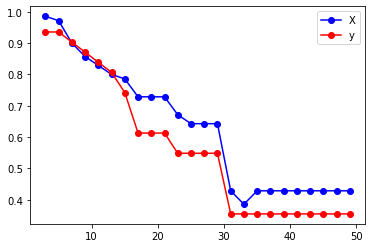

In [9]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc],'bo-')
plt.plot(np.arange(3,50,2),[i[1] for i in acc],'ro-')
plt.legend(['X','y'])

In [10]:
#Create a model
KNN_Classifier = KNC(n_neighbors = 5, p = 2, metric='minkowski')

In [11]:
KNN_Classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [12]:
y_test_pred = KNN_Classifier.predict(x_test)

In [13]:
#check the accuracy of your predicted classifier
acc = accuracy_score(y_test, y_test_pred)
acc

0.9354838709677419